<a href="https://colab.research.google.com/github/christiano1974/portifolios-trabalho/blob/main/M%C3%A9todo_de_interpola%C3%A7%C3%A3o_para_o_c%C3%A1lculo_de_integral.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
### Neste exercício é aplicado o método da interpolação para calcular a integral definida da função
### sin(pi*x**2/2) em relação ao intervalo [0,1]. Está função não tem primitiva a idéia é substitui - lo por uma
### função polinomial com valor da integral bem próxima da função original onde é possível usar o teorema fundamental.
### do cálculo e de mais fácil resolução.

In [3]:
from sympy import *
import matplotlib.pyplot as plt
%matplotlib inline
from mpmath import *
from math import *
from numpy import *

In [5]:
# função sin(pi*x**2/2)
f = lambda x: sin(pi*pow(x,2)/2)

In [6]:
# integral definida da função sin(pi*x**2/2) em relação ao intervalo [0,1]
quad(f,[0,1])

mpf('0.43825914739035476')

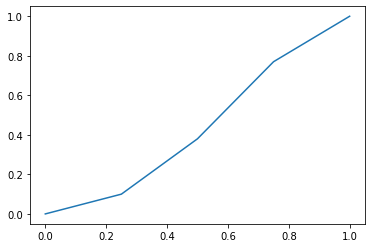

In [7]:
# gráfico da função sin(pi*x**2/2) em relação ao intervalo [0,1]
X = [0.00,0.25,0.50,0.75,1.00]
y = []
for valor in X:
  y.append(round(f(valor),2))
plt.plot(X,y)

In [8]:
# processo de interpolação dos pontos (0.00,f(0.00)), (0.25,f(0.25)), ...., (1.00,f(1.00)) para
# determinar a função polinomial
A = matrix([[0.25**4,0.25**3,0.25**2,0.25],
            [0.50**4,0.50**3,0.50**2,0.50],
            [0.75**4,0.75**3,0.75**2,0.75],
            [1.00**4,1.00**3,1.00**2,1.00]])
B = matrix([[f(0.25)],[f(0.50)],[f(0.75)],[f(1.00)]])
inv_A = linalg.inv(A)
X_1 = inv_A*B
print(X_1)

[[-2.00543766]
 [ 2.14427998]
 [ 0.7623622 ]
 [ 0.09879547]]


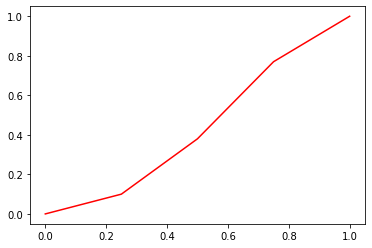

In [10]:
# função polinômial e o gráfico da função polinomial
pol = lambda x: - 2.005*pow(x,4) + 2.144*pow(x,3) + 0.7624*pow(x,2) + 0.099*pow(x,1)
X = [0.00,0.25,0.50,0.75,1.00]
y_1 = []
for valor in X:
  y_1.append(round(pol(valor),2))
plt.plot(X,y_1,color = "red")

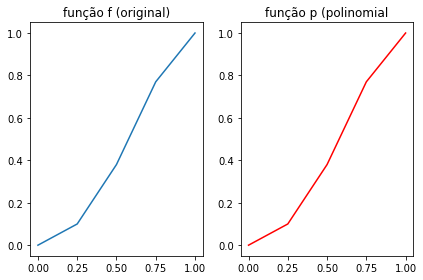

In [11]:
# o gráfico da função original e da função polinomial - comparação
fig, ax = plt.subplots(1,2)
ax[0].plot(X,y)
ax[0].set_title('função f (original)')
ax[1].plot(X,y_1,color = "red")
ax[1].set_title('função p (polinomial')
plt.tight_layout()

In [12]:
# cálculo das integrais - comparação - erro
print("Valor da integral definida da função original em relação ao intervalo [0,1]")
print(quad(f,[0,1]))
print("\nValor da integral definida da função polinomial em relação ao intervalo [0,1]")
print(quad(pol,[0,1]))
print("\nerro absoluto ou diferença absoluta")
print(math.fabs(quad(f,[0,1])- quad(pol,[0,1])))

Valor da integral definida da função original em relação ao intervalo [0,1]
0.438259147390355

Valor da integral definida da função polinomial em relação ao intervalo [0,1]
0.438633333333333

erro absoluto ou diferença absoluta
0.00037418594297861096
